데이터 불균형성 확인

In [1]:
import pandas as pd

In [2]:
data_path = './data'
rainfall_train = pd.read_csv('rainfall_train.csv')
rainfall_test = pd.read_csv('rainfall_test.csv')

In [3]:
rainfall_train.drop(columns=['Unnamed: 0'],inplace= True)
rainfall_test.drop(columns=['Unnamed: 0'], inplace=True)

## Train 데이터 분석


<table>
<tr><td><img src="./images/강수량 데이터 변수.png" /></td></tr>
<tr><td><img src="./images/데이터 정보.png" /></td></tr>
</table>

### TM_FC

#### rainfall_train.fc_year
- 3년 간의 강수량임을 확인 
- B년도의 분포가 적은편

#### rainfall_train.fc_month
- 5-9월 간의 데이터

#### rainfall_train.fc_hour
- 오전 9시, 오후 9시 발표된 데이터

#### rainfall_train.stn4contest
- 총 20개 지점
- 각 지점마다 약 72000개의 데이터


In [4]:
rainfall_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457252 entries, 0 to 1457251
Data columns (total 21 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   rainfall_train.fc_year         1457252 non-null  object 
 1   rainfall_train.fc_month        1457252 non-null  int64  
 2   rainfall_train.fc_day          1457252 non-null  int64  
 3   rainfall_train.fc_hour         1457252 non-null  int64  
 4   rainfall_train.stn4contest     1457252 non-null  object 
 5   rainfall_train.dh              1457252 non-null  int64  
 6   rainfall_train.ef_year         1457252 non-null  object 
 7   rainfall_train.ef_month        1457252 non-null  int64  
 8   rainfall_train.ef_day          1457252 non-null  int64  
 9   rainfall_train.ef_hour         1457252 non-null  int64  
 10  rainfall_train.v01             1457252 non-null  int64  
 11  rainfall_train.v02             1457252 non-null  int64  
 12  rainfall_train

In [5]:
rainfall_train['rainfall_train.fc_year'].value_counts()

A    488969
C    488572
B    479711
Name: rainfall_train.fc_year, dtype: int64

In [6]:
rainfall_train['rainfall_train.fc_month'].value_counts()

7    297473
8    297182
6    287788
5    287665
9    287144
Name: rainfall_train.fc_month, dtype: int64

In [7]:
rainfall_train['rainfall_train.fc_hour'].value_counts()

9     728825
21    728427
Name: rainfall_train.fc_hour, dtype: int64

In [8]:
len(rainfall_train['rainfall_train.stn4contest'].unique())

20

In [9]:
rainfall_train['rainfall_train.stn4contest'].value_counts()

STN001    72921
STN009    72921
STN019    72921
STN018    72921
STN015    72921
STN014    72921
STN010    72921
STN020    72921
STN008    72921
STN004    72921
STN003    72921
STN012    72919
STN002    72918
STN011    72900
STN013    72894
STN006    72868
STN016    72758
STN017    72682
STN007    72623
STN005    72559
Name: rainfall_train.stn4contest, dtype: int64

In [10]:
(rainfall_train['rainfall_train.fc_year'] != rainfall_train['rainfall_train.ef_year']).sum()

0

In [11]:
rainfall_train[['rainfall_train.fc_month','rainfall_train.ef_month']]

,rainfall_train.fc_month,rainfall_train.ef_month
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5
...,...,...
1457247,9,10
1457248,9,10
1457249,9,10
1457250,9,10


기준시각과 예측시간의 시각화를 위한 테이블
- TM_FC : 발표 시각
- TM_EF : 예측 시각
- DH : 예측 시각 과의 타임 간격

In [12]:
rainfall_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122000 entries, 0 to 121999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   rainfall_test.fc_year         122000 non-null  object 
 1   rainfall_test.fc_month        122000 non-null  int64  
 2   rainfall_test.fc_day          122000 non-null  int64  
 3   rainfall_test.fc_hour         122000 non-null  int64  
 4   rainfall_test.stn4contest     122000 non-null  object 
 5   rainfall_test.dh              122000 non-null  int64  
 6   rainfall_test.ef_year         122000 non-null  object 
 7   rainfall_test.ef_month        122000 non-null  int64  
 8   rainfall_test.ef_day          122000 non-null  int64  
 9   rainfall_test.ef_hour         122000 non-null  int64  
 10  rainfall_test.v01             122000 non-null  int64  
 11  rainfall_test.v02             122000 non-null  int64  
 12  rainfall_test.v03             122000 non-nul

발표 시각으로 부터 몇시간 떨어져 있는지를 DH 정보가 나타내고 TM_EF는 그것을 반영한 시간임을 보여줌

그러면 TM_FC와 DH 정보에 따라서 TM_EF의 파생정보가 나왔다고 유추할 수 있음

DH 정보가 3시간 단위로 진행되고,  240시간까지 진행되는데, TM_EF의 값이 여러 개 나옵니다. 

이것은 발표시간이 12시간 간격으로 진행되는데, 이전 발표시각에서 예측한 시간과 다음 발표시간에서 예측한 시간이 겹쳤기 때문입니다.

그렇기에 다수의 TM_EF와 stn4contest 그룹이 나올 수 있습니다.

그렇지만 실강수량은 TM_EF stn4contest 그룹에 1대1로 매칭되어야 했는데 이를 확인해본 결과 매칭됨을 확인할 수 있었습니다.

In [13]:
rainfall_train['rainfall_train.v01'].max()

100

각 강수 확률은 백분율을 기준으로 확률 값이 존재합니다.

### TM_FC

#### rainfall_train.fc_year
- 3년 간의 강수량임을 확인 
- B년도의 분포가 적은편

#### rainfall_train.fc_month
- 5-9월 간의 데이터

#### rainfall_train.fc_hour


In [14]:
rainfall_train.describe()

,rainfall_train.fc_month,rainfall_train.fc_day,rainfall_train.fc_hour,rainfall_train.dh,rainfall_train.ef_month,rainfall_train.ef_day,rainfall_train.ef_hour,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09,rainfall_train.vv,rainfall_train.class_interval
count,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06,1.457252e+06
mean,7.005731e+00,1.581544e+01,1.499836e+01,1.214087e+02,7.178478e+00,1.577546e+01,1.050009e+01,3.031941e+01,2.536454e+01,1.849005e+01,1.357588e+01,9.381005e+00,4.638297e+00,1.906566e+00,4.369457e-01,1.389821e-01,-4.969430e+00,-5.156755e+00
std,1.406832e+00,8.865553e+00,6.000002e+00,6.926163e+01,1.456103e+00,8.856348e+00,6.873960e+00,2.924621e+01,2.699152e+01,2.307048e+01,1.963228e+01,1.595597e+01,1.039028e+01,5.843288e+00,2.281773e+00,1.108457e+00,7.622342e+01,7.610076e+01
min,5.000000e+00,1.000000e+00,9.000000e+00,3.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02
25%,6.000000e+00,8.000000e+00,9.000000e+00,6.000000e+01,6.000000e+00,8.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,1.600000e+01,9.000000e+00,1.200000e+02,7.000000e+00,1.600000e+01,1.200000e+01,2.200000e+01,1.600000e+01,9.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+00,2.400000e+01,2.100000e+01,1.800000e+02,8.000000e+00,2.300000e+01,1.800000e+01,5.000000e+01,4.100000e+01,2.800000e+01,1.900000e+01,1.200000e+01,4.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.000000e+00,3.100000e+01,2.100000e+01,2.400000e+02,1.000000e+01,3.100000e+01,2.100000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,9.900000e+01,2.032000e+02,9.000000e+00


In [15]:
rainfall_train['rainfall_train.class_interval'].value_counts()

 0      1223315
 5        41407
 2        34054
 4        33427
 3        30692
 6        27964
 1        21562
 7        21168
-999       8490
 8         8187
 9         6986
Name: rainfall_train.class_interval, dtype: int64

### 무강수 데이터 월별 분포 보기

In [16]:
#결측치 제거 8490개
rainfall_train= rainfall_train[rainfall_train['rainfall_train.class_interval'] != -999]
#결측치 제거된 데이터 개수 1457252 : 1223315
non_rainfall=rainfall_train[rainfall_train['rainfall_train.class_interval'] == 0]

array([[<Axes: title={'center': 'rainfall_train.ef_month'}>]],
      dtype=object)

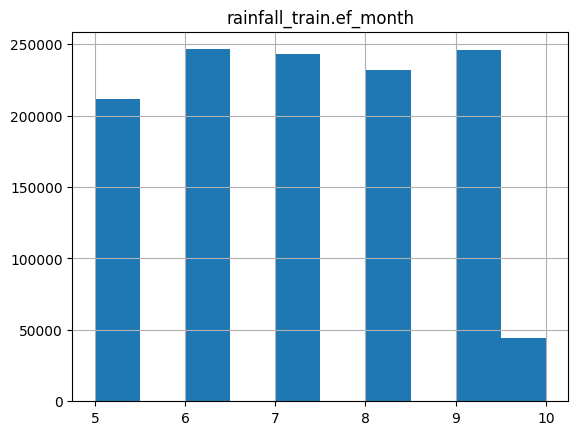

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

non_rainfall.hist(column=['rainfall_train.ef_month'])

<Axes: xlabel='rainfall_train.ef_hour'>

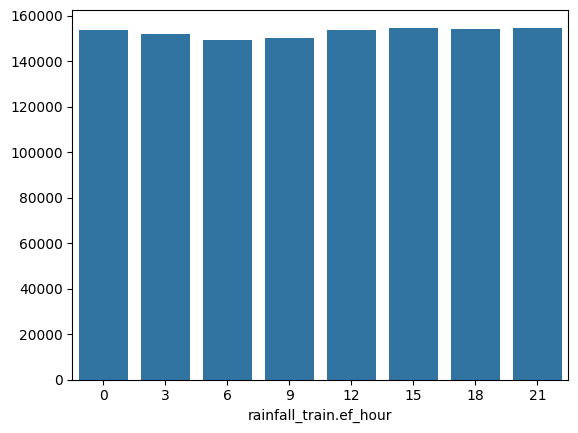

In [18]:
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(8))
x = non_rainfall.groupby(by=['rainfall_train.ef_hour'])['rainfall_train.v01'].count().index
y = non_rainfall.groupby(by=['rainfall_train.ef_hour'])['rainfall_train.v01'].count().values

sns.barplot(x=x,y=y)


Text(0.5, 1.0, '지점별 무강수 데이터 분포')

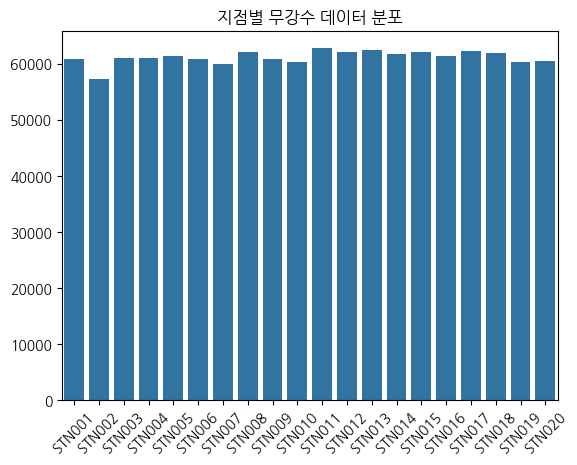

In [19]:
# rainfall_train['rainfall_train.stn4contest']
tmp = non_rainfall.groupby(by=['rainfall_train.stn4contest'])['rainfall_train.fc_hour'].count()
x = tmp.index.values
y = tmp.values
plt.rcParams['font.family'] = "NanumGothic"
sns.barplot(x=x,y=y)
plt.xticks(rotation=45)
plt.title("지점별 무강수 데이터 분포")

array([[<Axes: title={'center': 'rainfall_train.ef_day'}>]], dtype=object)

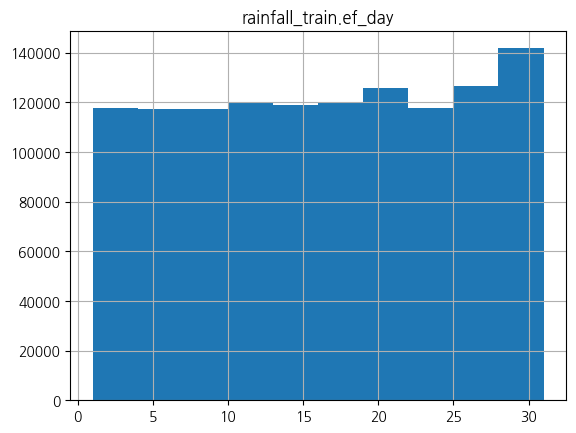

In [20]:
non_rainfall.hist(column=['rainfall_train.ef_day'])

/tmp/ipykernel_291663/951082933.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(np.arange(20))
/tmp/ipykernel_291663/951082933.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(np.arange(20))
/tmp/ipykernel_291663/951082933.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(np.arange(20))
/tmp/ipykernel_291663/951082933.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(np.arange(20))
/tmp/ipykernel_291663/951082933.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks(

Text(0.5, 0.98, '지점별 강수 데이터 분포')

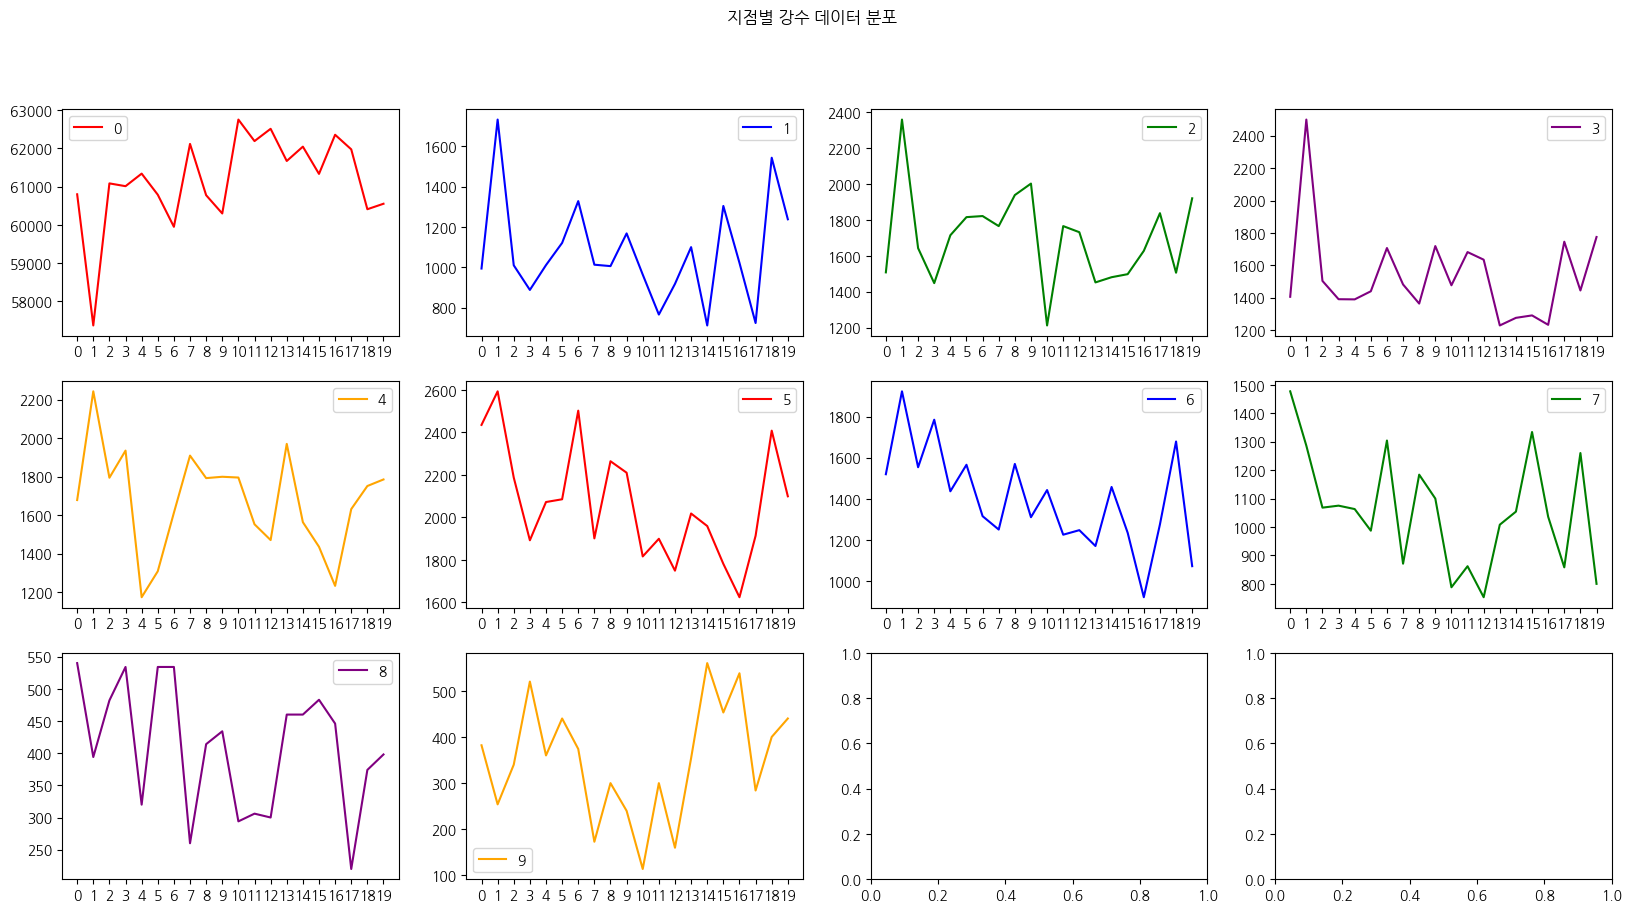

In [42]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i][['rainfall_train.stn4contest']].value_counts().sort_index()
    sns.lineplot(x= np.array([i[0]for i in tmp.index.values]),y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(np.arange(20))

fig.suptitle("지점별 강수 데이터 분포")

/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)


Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')


/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')
Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')


/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)


Int64Index([5, 6, 7, 8, 9, 10], dtype='int64')

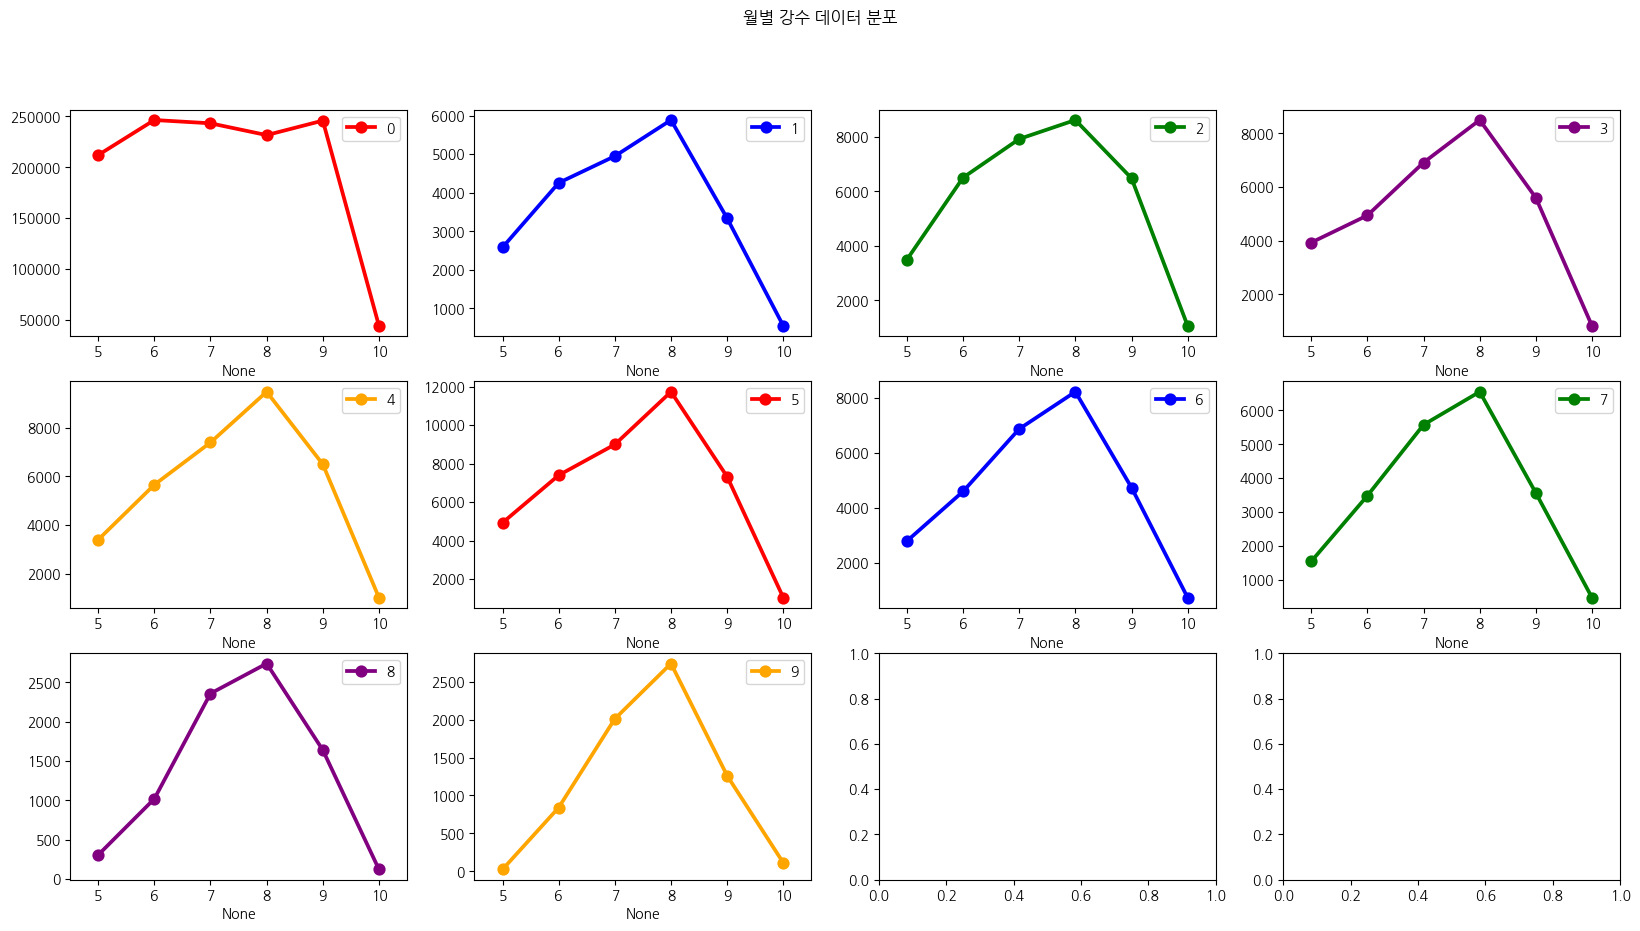

In [40]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_month'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(tmp.index)
    print(tmp.index)
fig.suptitle("월별 강수 데이터 분포")
tmp.index

/tmp/ipykernel_291663/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_291663/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using 

Int64Index([0, 3, 6, 9, 12, 15, 18, 21], dtype='int64')

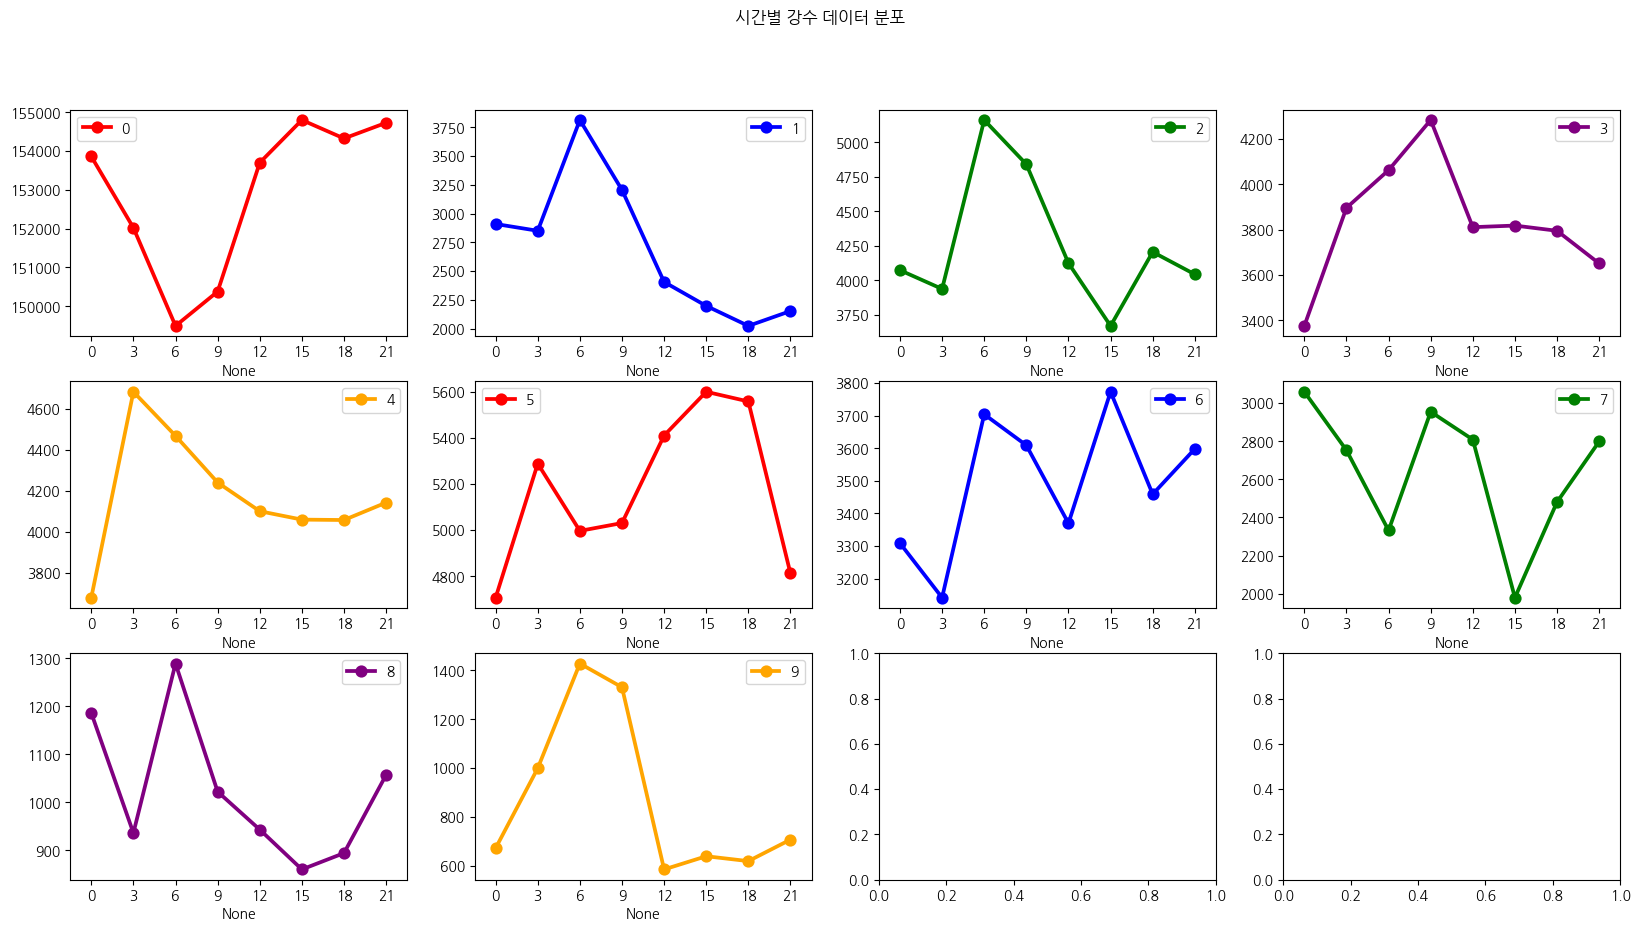

In [45]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_hour'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(tmp.index)
fig.suptitle("시간별 강수 데이터 분포")
tmp.index

/tmp/ipykernel_291663/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_291663/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_291663/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_291663/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_291663/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fix

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

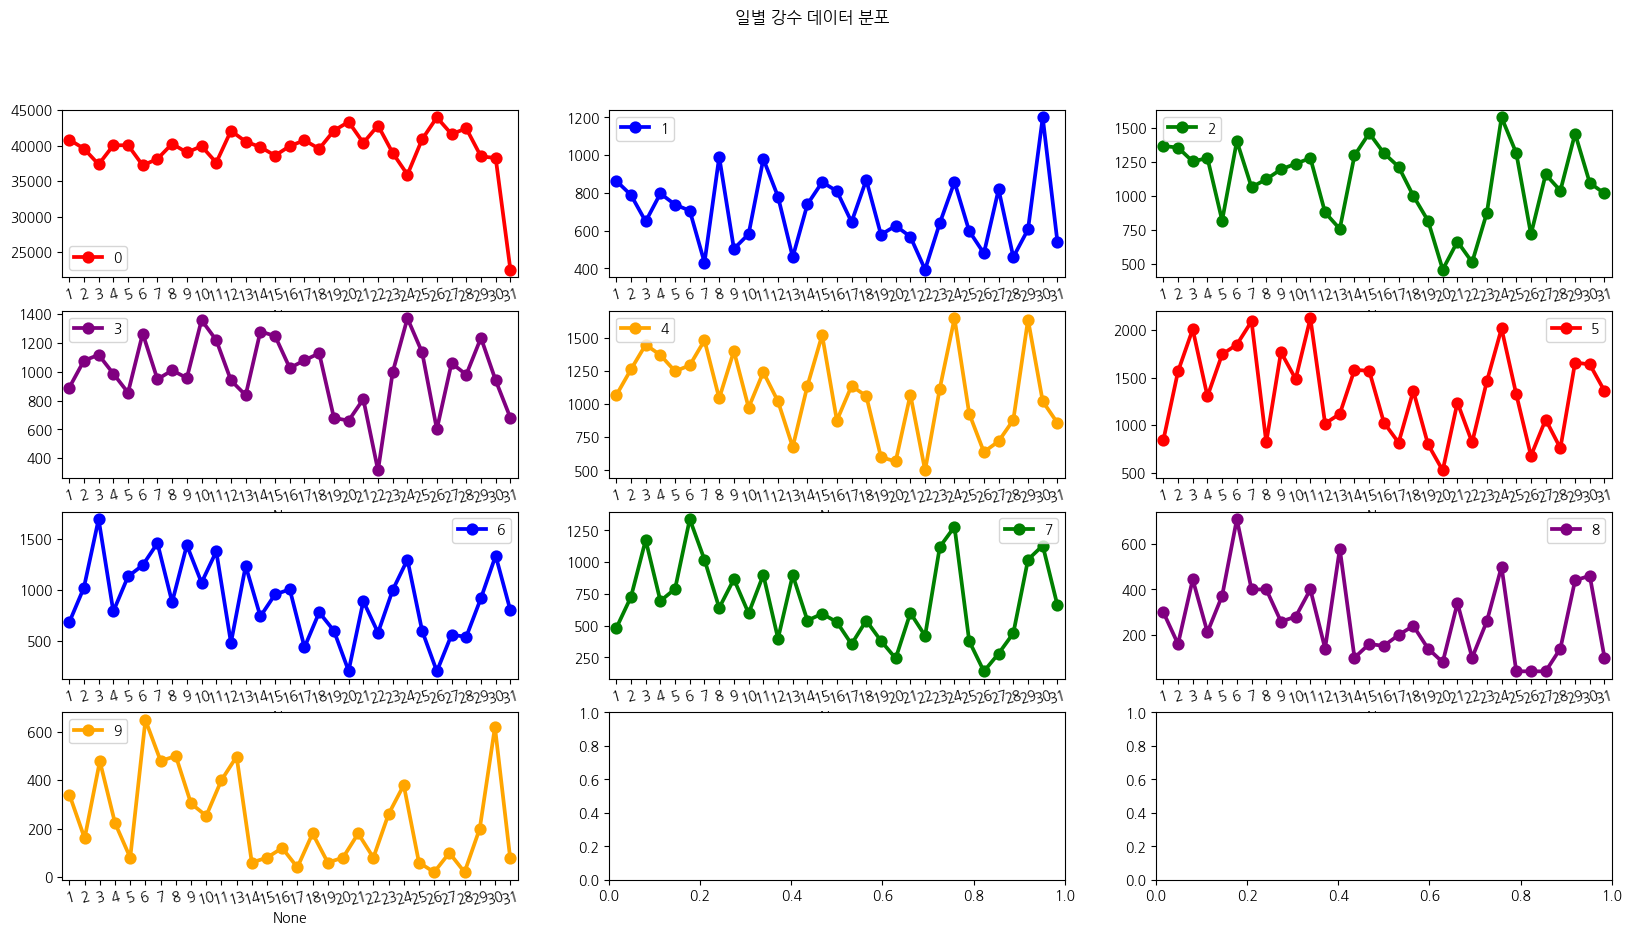

In [56]:
import numpy as np

fig, axes = plt.subplots(4,3, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_day'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//3,i%3], color=color)
    axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
fig.suptitle("일별 강수 데이터 분포")
tmp.index

## 지점 데이터 변수 확인

- test 데이터와 train 데이터에서 지점의 이름이 다른 것을 확인
- 지점별로 데이터가 바뀌지 않음을 확인해야 함.

In [1]:
import pandas as pd

df = pd.read_csv('daegun_first.csv')

In [7]:
df

,TM_FC,TM_EF,DH,VV,STN,V1,V2,V3,V4,V5,V6,V7,V8,V9,class,V0,EF_class
0,A년05월01일09시,A년05월01일12시,3,0.0,STN001,0,0,0,0,0,0,0,0,0,0,100,0
1,A년05월01일09시,A년05월01일15시,6,0.0,STN001,0,0,0,0,0,0,0,0,0,0,100,0
2,A년05월01일09시,A년05월01일18시,9,0.0,STN001,0,0,0,0,0,0,0,0,0,0,100,0
3,A년05월01일09시,A년05월01일21시,12,0.0,STN001,0,0,0,0,0,0,0,0,0,0,100,0
4,A년05월01일09시,A년05월02일00시,15,0.0,STN001,0,0,0,0,0,0,0,0,0,0,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457247,C년09월30일21시,C년10월10일09시,228,0.5,STN020,2,5,0,2,0,0,0,0,0,3,91,0
1457248,C년09월30일21시,C년10월10일12시,231,0.0,STN020,4,4,2,2,1,0,0,0,0,0,87,0
1457249,C년09월30일21시,C년10월10일15시,234,1.9,STN020,4,4,2,2,1,0,0,0,0,4,87,0
1457250,C년09월30일21시,C년10월10일18시,237,1.9,STN020,2,2,2,0,2,0,0,0,0,4,92,0


In [13]:
df.groupby(by=['TM_EF','STN'])['class'].nunique()

TM_EF        STN   
A년05월01일12시  STN001    1
             STN002    1
             STN003    1
             STN004    1
             STN005    1
                      ..
C년10월10일21시  STN016    1
             STN017    1
             STN018    1
             STN019    1
             STN020    1
Name: class, Length: 78000, dtype: int64

지점별로 데이터가 바뀐다...

